# CS535/EE514 Machine Learning - Spring 2024 - Assignment 1

# Univariate Polynomial Regression using Least Square Solution

**Date Assigned**: Saturday, January 27, 2024

**Date Due**: Monday, February 5, 2024 (5:00 pm)

**Important Notes**

1.   The assignment integrates tasks spanning methods as well as principles. Some tasks will involve implementation (in Python) and some may require mathematical analysis.  
2.   All cells must be run once before submission and should be displaying the results(graphs/plots etc). Failure to do so will result in deduction of points.
3.   While discussions with your peers is strongly encouraged, please keep in mind that the assignment is to be attempted on an individual level. Any plagiarism (from your peers) will be referred to the DC without hestitation.
4. For tasks requiring mathematical analysis, students familiar with latex may type their solutions directly in the appropriate cells of this notebook. Alternatively, they may submit a hand-written solution as well.
5. Use procedural programming style and comment your code properly.
5. Upload your solutions on the Assignment tab and submit your hand-written solutions in the drop-box next to the instructor's office.
5. **Policy on Usage of Generative AI Tools**. Students are most welcome to use generative AI tools as partners in their learning journey. However, it should be kept in mind that these tools cannot be blindly trusted for the tasks in this assignment (hopefully) and therefore it is important for students to rely on their own real intelligence (pun intended) before finalizing their solution/code. It is also mandatory for students to write a statement on how exactly have they used any AI tool in completing this assignment.
5. **Vivas** The teaching staff reserves the right to conduct a viva for any student.   
5. **Policy on Late Submission**. Late solutions will be accepted with a 15% penalty per day till Wednesday, February 7 2024 (5:00 pm). No submissions will be accepted after that.      




**Introduction to Polynomial Regression** In this assignment, we will explore the concept of the Least Squares Method, often referred to as the Pseudo Inverse technique in linear regression. This method is a mathematical approach used to find the best fitting function to a given set of data points by minimizing the sum of the squares of the vertical distances of the points from the function.

The formula for the least squares solution in matrix form is:

$$
    \mathbf{w} = (X^TX)^{-1}X^T\mathbf{y}
$$
Here,

$\mathbf{w}$ represents the coefficients of the regression line,

X is the matrix of input features, and

$\mathbf{y}$ is the vector of output values.

By using polynomial features (powers of the original features), we can fit more complex models to the data. Refer to class discussions and notes for details.

## Preliminaries

Run these cells once (to import libraries and to generate the dataset) .

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


ModuleNotFoundError: No module named 'matplotlib'

In this exercise, we have a *synthetic* dataset that represents the relationship between diabetes progression (x) and body mass index (BMI) (y) of 80 individuals. The relationship between diabetes progression and the BMI is modeled using a cosine function, and some random noise is added to simulate real-world data variations.

The data has already been split for you into training and validation/testing set. Both training and validation sets contain 40 points each.

**Please do not change the code provided.** Run the following cell once to generate the synthetic dataset.

In [ ]:
def diabetes(X):
    return np.cos(1.5 * np.pi * X)

n_samples_diabetes_datapoints = 80

X_diabetes = np.sort(np.random.rand(n_samples_diabetes_datapoints))
y_BMI = diabetes(X_diabetes) + np.random.randn(n_samples_diabetes_datapoints) * 0.25

x_train, x_test, y_train, y_test = train_test_split(X_diabetes, y_BMI, test_size=0.5, random_state=10)

## Task 1.
Write Python code to implement four functions: (a) `make_matrix`, (b) `least_square_solution`, (c) `predict`, and (d) `mse_loss`. Description of the functionalities of each one of these functions is given below.

1. `make_matrix`:
- Purpose: This function is designed to transform a single-dimensional input array into a matrix of polynomial features. It is essential for preparing the data for polynomial regression.
- Inputs:
    - x: A single-dimensional numpy array containing the input feature values.
    - degree: An integer representing the degree of the polynomial transformation (akin to the parameter *M* used in class).
- Output: A two-dimensional numpy array corrersponding to the matrix *X* discussed in class. Row-*i* of this matrix corresponds to the data point $x_i$  transformed into polynomial features starting from degree 0 all the way up to the specified degree. Ensure that for an input array x of length N and a polynomial degree M, the output matrix has dimensions N x (M+1).

2. `least_square_solution`:
- Purpose: To compute the coefficients of the polynomial regression model using the least squares method.
- Inputs:
    - x: Single dimensional numpy array containing input feature variabbles. You would have to convert it into a matrix of polynomial features using the make_matrix function.
    - y: The output values corresponding to each input feature.
    - degree: The degree of the polynomial regression.
- Output: A numpy array containing the coefficients (parameters) of the fitted polynomial model.


3. `predict`:
- Purpose: To predict the output values for a given set of input features using the fitted polynomial regression model.
- Inputs:
    - x: A numpy array of input features (can be either the original features or polynomial features depending on the model).
    - w: The coefficients of the fitted polynomial regression model.
- Output: A numpy array containing the predicted output values.
- Note: Do not forget the bias term!!!

4. `mse_loss`:
- Purpose: To compute the Mean Squared Error (MSE) loss, which measures the average of the squares of the errors, i.e., the average squared difference between the estimated values and the actual value.
- Inputs:
    - y: The true output values.
    - y_hat: The predicted output values from the model.
- Output: A single value representing the MSE.

- The formula for MSE is given by:

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_{i})^2
$$

Where:
- N is the number of samples.
- $y_i$ is the true value for the ith sample.
- $\hat{y}_i = \mathbf{w}^T \mathbf{x}_i$ isthe predicted value for the ith sample.

In [ ]:
# Function to create polynomial feature matrix of size len(x) x (degree + 1)
def make_matrix(x, degree):
    temp = [x ** i for i in range(degree + 1)]
    temp = np.transpose(temp)
    return temp

# Function to perform univariate linear regression using pseudoinverse
def least_square_solution(x, y, degree):
    poly_matrix = make_matrix(x, degree)
    
    # computing components of pseudoinverse equation
    xTx = np.dot(poly_matrix.T, poly_matrix)
    xTx_inverse = np.linalg.inv(xTx)
    xTy = np.dot(poly_matrix.T, y.T)
    w = np.dot(xTx_inverse, xTy)
    return w

# Function to make predictions
def predict(X, w):
    y_hat = np.dot(X, w)
    return y_hat

# MSE loss function
def mse_loss(y, y_hat):
    e = y - y_hat.T
    se = e ** 2
    mse = np.mean(se)
    return mse

##Task 2
In this task, using the functions developed in Task 1, you will apply polynomial regression to the diabetes progression dataset and evaluate the performance of your models by fitting polynomial models of varying degrees to the training data and assessing their performance on both the training and testing sets. You will also be required to visualize model outputs.

Write code that performs the following steps for polynomial orders ranging from 1 to 9.

- For deg in range(1,10):

1. `Model Fitting and Prediction`:

  Fit a polynomial regression model to the training data for polynomial degree deg.

2. `Visualization`:

 Use matplotlib to visualize the model's fit to the data. Your plot should clearly show the training data, testing data, and the model's predicted curve. You should also label the x and y axis as diabities and BMI. The title of the graph should indicate the degree of the specific graph. For example, "Polynomial Linear Regression (Degree 1) ". You should also a provide a legend indicating what each point represents.


3. `Model Evaluation`:

 Calculate the Mean Squared Error (MSE) for both the training and testing/validation datasets for each model and store these in separate lists.

- Plot the train error and the validation error on the same plot as a function of the polynomial order. Create a legend of the training and validation loss.  Give the color red to the validation loss and blue to the training loss. For the validation loss curve, add markers ('o') to each point on the graph for better visibility. Highlight the minimum point on this curve with a different color (e.g. red).

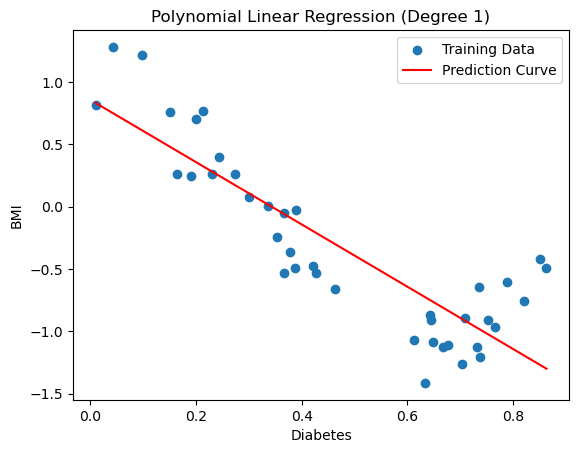

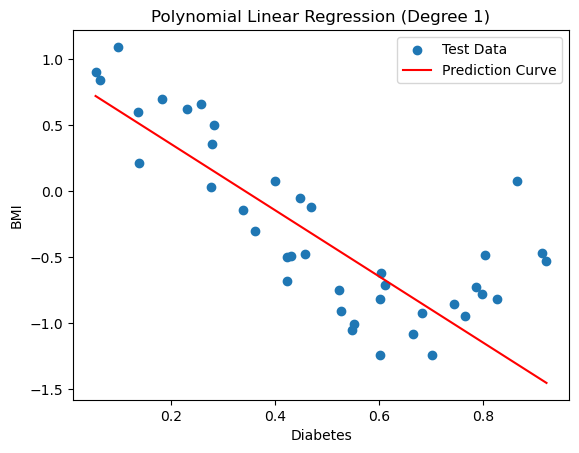

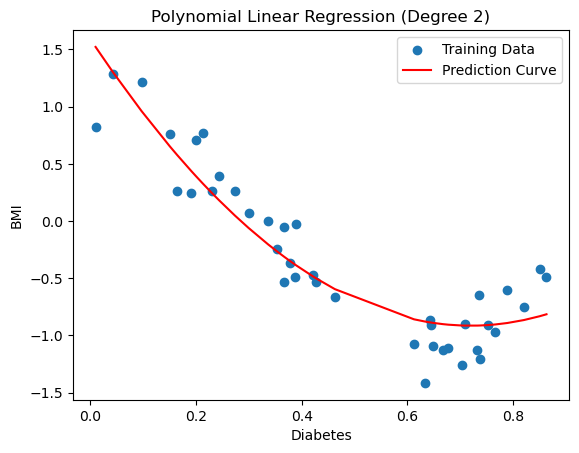

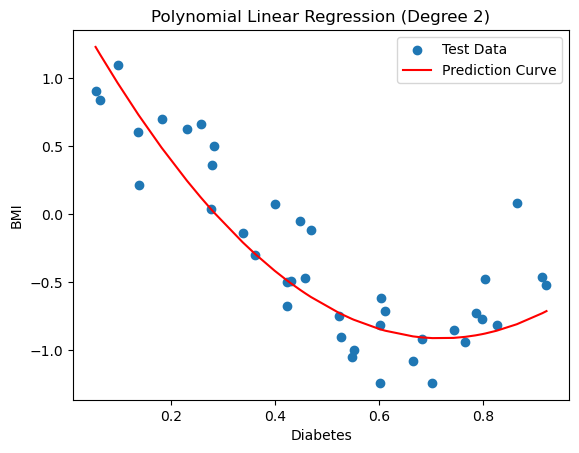

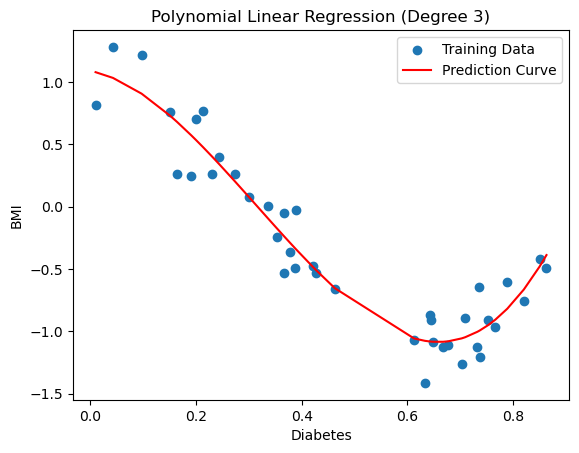

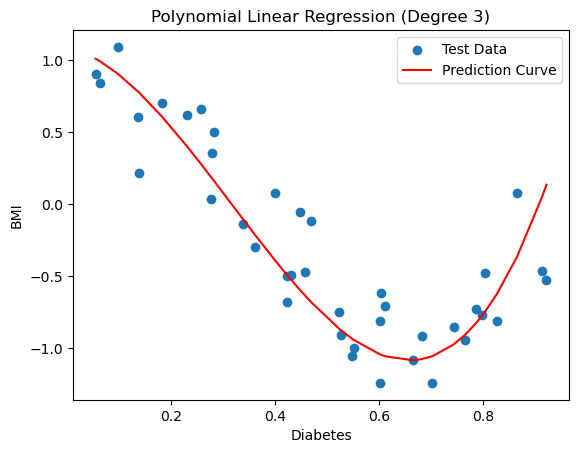

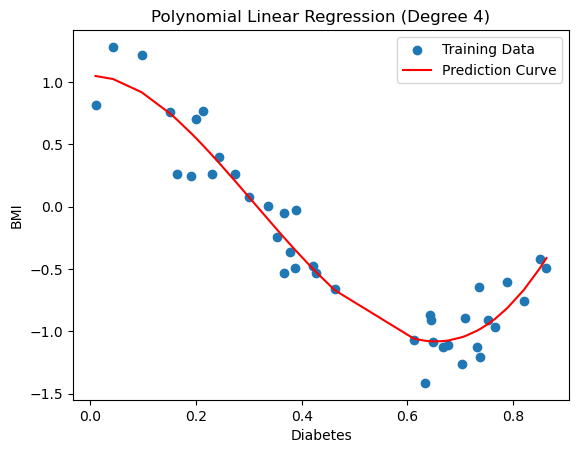

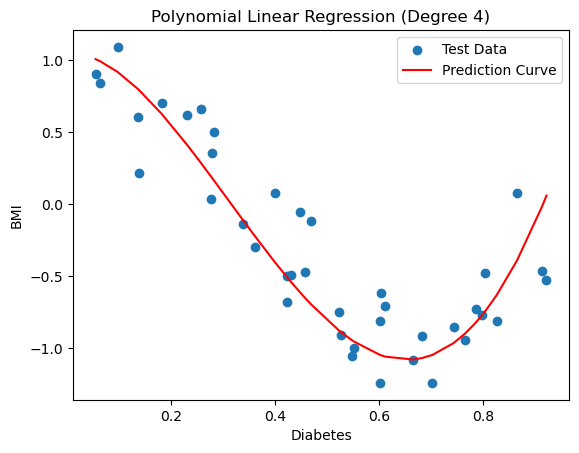

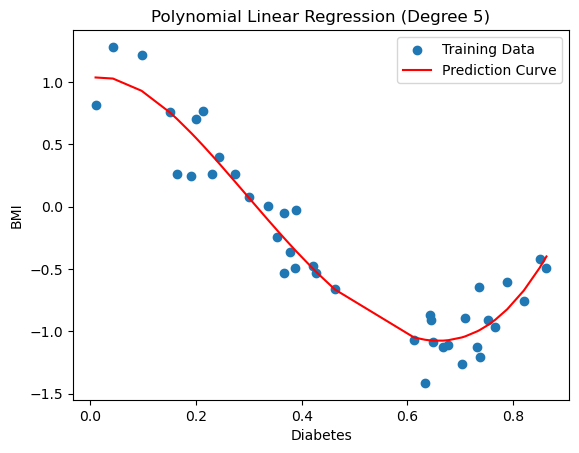

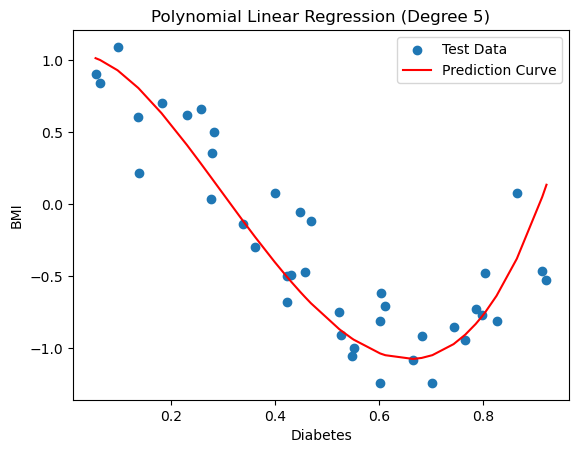

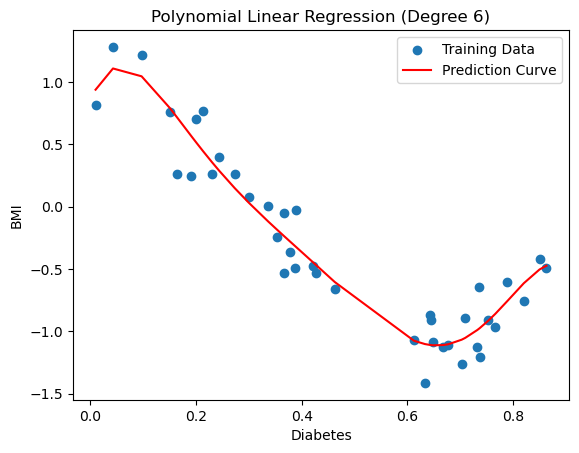

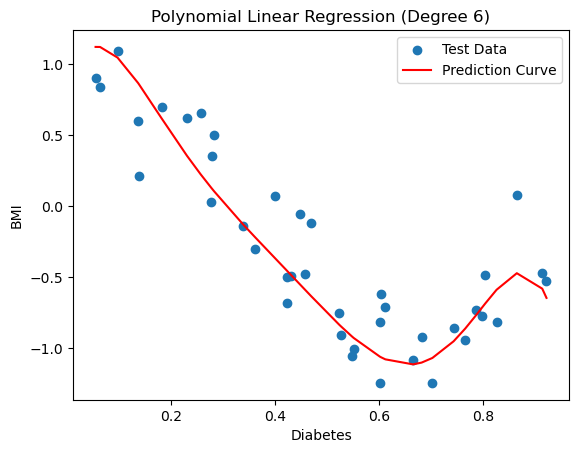

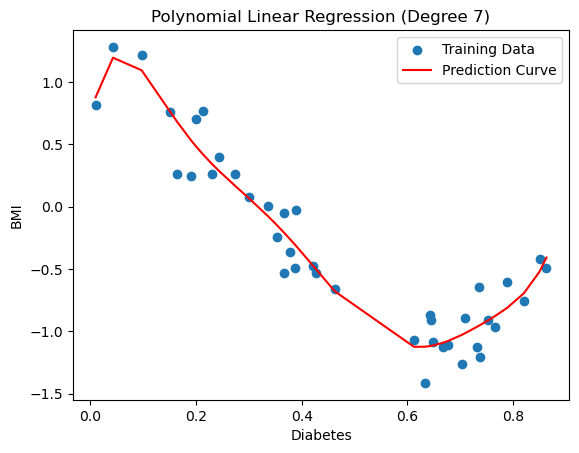

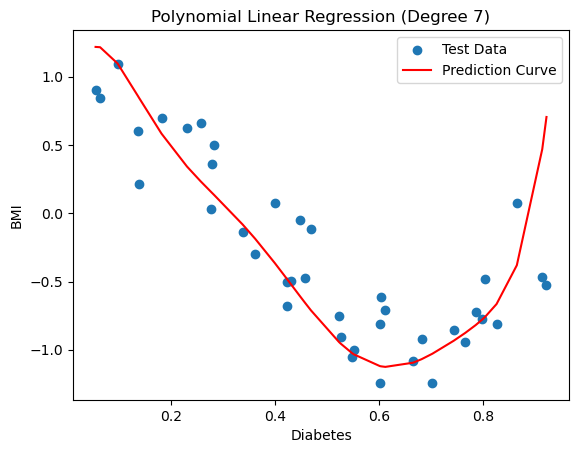

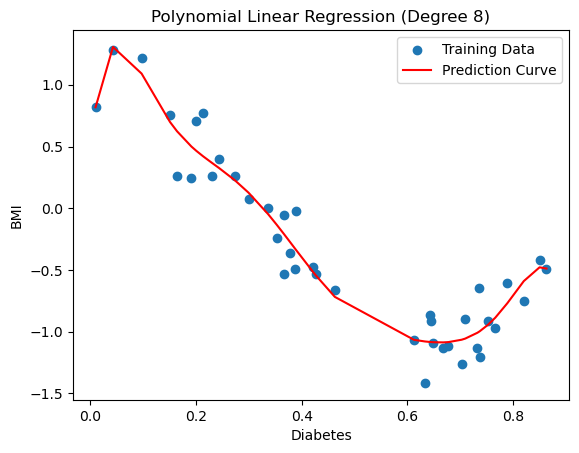

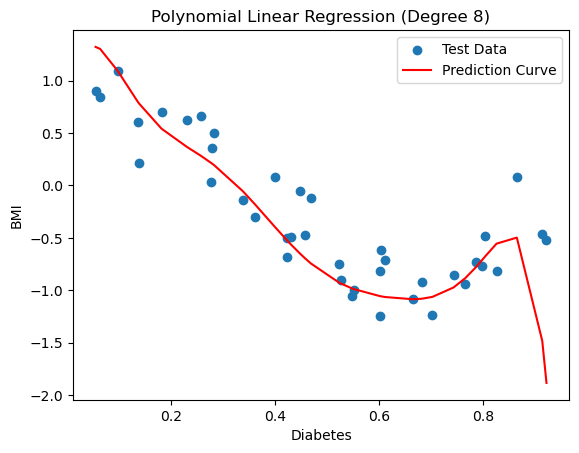

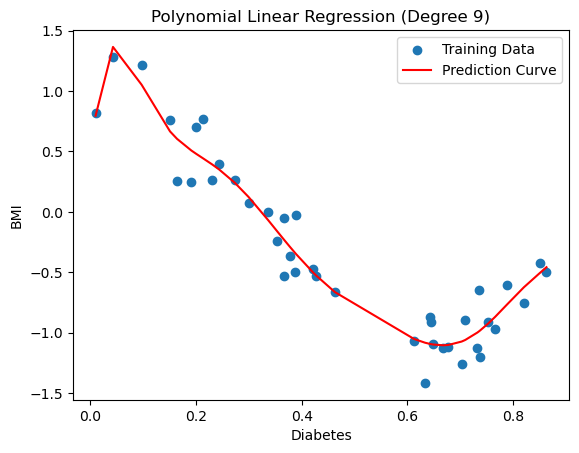

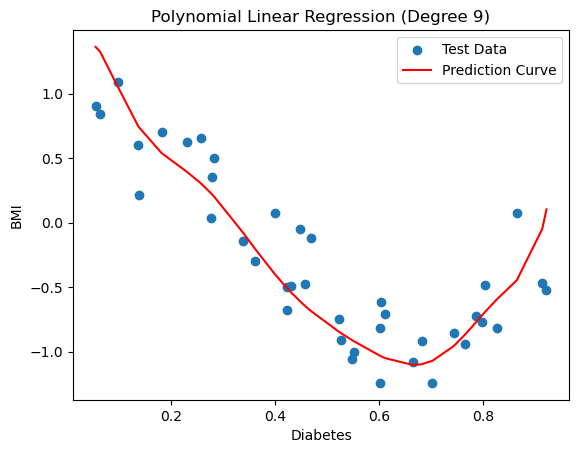

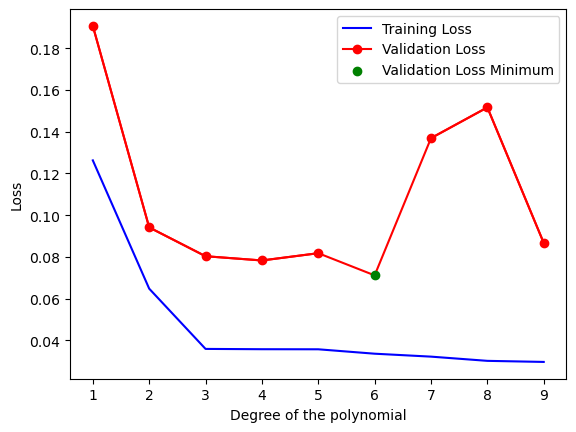

In [ ]:
train_error_list = []
validation_error_list = []

for deg in range(1,10):
    # 1. Estimate the best model using least square fitting
    X_train = make_matrix(x_train, deg)
    w_train = least_square_solution(x_train, y_train, deg)

    X_test = make_matrix(x_test, deg)

    # 2. Make predictions
    predict_train = predict(X_train, w_train)
    predict_test = predict(X_test, w_train)

    # 3. Visualize model's fit to data
    indices = np.argsort(x_train)
    x_train_sorted = x_train[indices]
    predict_train_sorted = predict_train[indices]

    indices = np.argsort(x_test)
    x_test_sorted = x_test[indices]
    predict_test_sorted = predict_test[indices]

    plt.scatter(x_train, y_train, label="Training Data")
    plt.plot(x_train_sorted, predict_train_sorted, "r", label="Prediction Curve")
    plt.legend()
    plt.xlabel("Diabetes")
    plt.ylabel("BMI")
    plt.title("Polynomial Linear Regression (Degree " + str(deg) + ")")
    plt.show()

    plt.scatter(x_test, y_test, label="Test Data")
    plt.plot(x_test_sorted, predict_test_sorted, "r", label="Prediction Curve")
    plt.legend()
    plt.xlabel("Diabetes")
    plt.ylabel("BMI")
    plt.title("Polynomial Linear Regression (Degree " + str(deg) + ")")
    plt.show()
    
    # 4. Store training and testing/validation loss in the lists defined above
    train_error = mse_loss(y_train, predict_train)
    train_error_list.append(train_error)

    test_error = mse_loss(y_test, predict_test)
    validation_error_list.append(test_error)

# Plot the training and validation loss
degree_axis = np.arange(1, 10)
plt.plot(degree_axis, train_error_list, label="Training Loss", color="blue")

# minimum value
min_y = np.argmin(validation_error_list)
min_x = degree_axis[min_y]

plt.plot(degree_axis, validation_error_list, color="red", zorder=0)
plt.plot(degree_axis[:min_y], validation_error_list[:min_y], label="Validation Loss", color="red", marker="o")
plt.plot(degree_axis[1+min_y:], validation_error_list[1+min_y:], color="red", marker="o")
plt.scatter(degree_axis[min_y], validation_error_list[min_y], label="Validation Loss Minimum", color="g")
plt.xlabel("Degree of the polynomial")
plt.ylabel("Loss")

plt.legend()
plt.show()

#Task 3
Now, instead of looking at the training and test loss separately, we will consider their sum. This will help us the identify the degree at which the minimal loss occurred (optimal balance between learning from the training data and generalizing to the testing data).

Plot a graph of sum of the training and validation losses vs the degree. The x and y axis of your graph should be labelled as degree and sum of losses, respectively. Add markers ('o') to each point on the graph for better visibility. Highlight the minimum point on the graph with a different color (e.g., red) to indicate the polynomial degree with minimum loss.

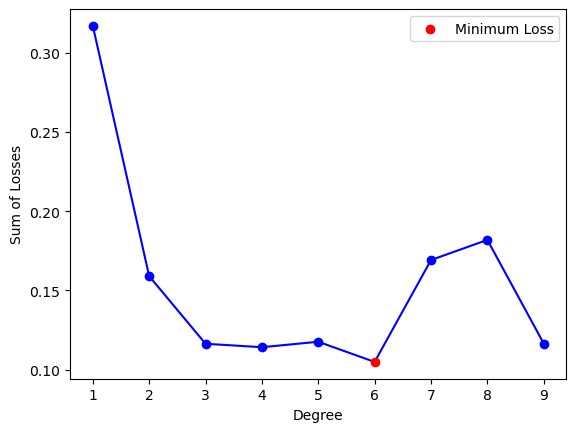

In [ ]:
# plot sum of both losses and highlight the best degree
## YOUR CODE HERE ##
error_sum_list = np.add(validation_error_list, train_error_list)
min_loss_index = np.argmin(error_sum_list)

plt.plot(degree_axis, error_sum_list, color="b", zorder=0)
plt.scatter(degree_axis[:min_loss_index], error_sum_list[:min_loss_index], color='b')
plt.scatter(degree_axis[min_loss_index + 1:], error_sum_list[min_loss_index + 1:], color='b')
plt.scatter(degree_axis[min_loss_index], error_sum_list[min_loss_index], color='r', label="Minimum Loss")
plt.xlabel("Degree")
plt.ylabel("Sum of Losses")
plt.legend()
plt.show()


## Task 4

1. Using mathematical arguments, prove that the training loss must always exhibit a non-increasing trend as the polynomial order increases. (Thus if the training loss computed in Task 2 does not follow this trend, there is something wrong with your code).
2. If one is free to choose any polynomial degree one wants, can a zero training loss be ever achieved? Provide a sound mathematical justification to support your answer. Also, if your answer is yes, determine what choice of polyonomial degree will guarantee zero loss.
3. To determine the best degree polynomial for the given dataset, would you choose the validation loss versus polynomial degree curve of Task 2 or the sum loss versys polynomial degree curve of Task 3? Justify the choice you make.
4. For what value(s) of the diabetes progression value(s) will the third-order and the fourth-order model yield the same BMI value(s)? Show any mathematical working you have, and also Write Python code to compute these values.

**ANSWERS**

1. As the degree of the polynomial increases, the model fits the data more closely, leading to a reduction in the training loss. As with a higher degree, the model becomes more sensitive to the input training data. The complexity of the model also corresponds to the models parameters and typically, a model with more parameters is likely to fit the data better, which might lead to overfitting.

2. Acheiving a zero training loss is theoretically possible. For a given training data set, our number of model parameters must match. Although this would lead to overfitting, each parameter could map to each data point, thus mapping every data point to each parameter of the model. This would theoretically achieve a zero training loss.

3. Choosing the validation loss versus polynomial degree curve of Task 2 is the better choice. It focusses on the validation loss, which is a more reliable metric for assessing the generalizability of a model on data. Even when choosing a model, it is better to prioritize performance on unseen data. The validation loss curve provides clearer indication of how well the model is expected to generalize.

4. 
For our third-order and fourt-order model, we have the equations:
$$ y_3(x) =  1 + w_1x^1 + w_2x^2 + w_3x^3 $$
$$ y_4(x) =  1 + w_1x^1 + w_2x^2 + w_3x^3 + w_4x^4 $$

We can set both equations equal to one another:
$$ 1 + w_1x^1 + w_2x^2 + w_3x^3 = 1 + w_1x^1 + w_2x^2 + w_3x^3 + w_4x^4 $$

And by cancelling out commong terms, we get:
$$ w_4x^4 = 0 $$

So at a diabetes progression value of x = 0, we get the third and fourth ordel models yielding the same bmi values.



In [ ]:
# YOUR CODE HERE (for Task 4, part 4) ##
# Task 4

X_train = make_matrix(x_train, 3)
w_train_3 = least_square_solution(x_train, y_train, 3)
predict_train_3 = predict(X_train, w_train_3)
indices = np.argsort(x_train)
x_train_sorted_3 = x_train[indices]
predict_train_sorted_3 = predict_train_3[indices]

X_train = make_matrix(x_train, 4)
w_train_4 = least_square_solution(x_train, y_train, 4)
predict_train_4 = predict(X_train, w_train_4)
indices = np.argsort(x_train)
x_train_sorted_4 = x_train[indices]
predict_train_sorted_4 = predict_train_4[indices]

three_values = []
four_values = []
for x in range(10):
    three_values.append(np.round(predict_train_sorted_3[x], 2))
    four_values.append(np.round(predict_train_sorted_4[x], 2))

for y in three_values:
    if y in four_values:
        for x in range (10):
            if np.round(predict_train_sorted_4[x], 2) == y:
                print("Same BMI value of: ", y, " at diabetes progression value of: ", x)
plt.show()


1. 

## Task 5
Consider a modification of the squared error considered in class where each data point in the training data may be weighted differently. Mathematically, the *weighted* squared error is given as

$$
L = \frac{1}{N} \sum_{i=1}^N \alpha_i \left( y_i - \mathbf{x}_i^T \mathbf{w}\right)^2
$$
where $\alpha_i$ is the weight assigned to training data-point $i$. As before, the vector $\mathbf{x}_i$ represents the feature vector (which includes the bias and may very well be made of powers of a single feature), and $\mathbf{w}$ is the parameter vector. A higher $\alpha_i$ means more importance given to the corresponding data point.

Assuming that the weights are fixed, modify the methodology discussed in class to derive the optimal parameter vector $\hat{\mathbf{w}}$ that minimizes this weighted loss.


**ANSWER**
$$
L = \frac{-2}{N} \sum_{i=1}^N \alpha_i \left( y_i - \mathbf{x}_i^T \mathbf{w}\right)(x_i)
$$

$$
L = \sum_{i=1}^N \alpha_i \left( y_i - \mathbf{x}_i^T \mathbf{w}\right)x_i = \sum_{i=1}^N \left( \alpha_i y_i x_i - \alpha_i x_i \mathbf{x}_i^T \mathbf{w}\right)
$$

$$
\sum_{i=1}^N ( \alpha_i y_i x_i)  - \sum_{i=1}^N  (\alpha_i x_i \mathbf{x}_i^T \mathbf{w}) = 0
$$

$$
\sum_{i=1}^N ( \alpha_i y_i x_i) = \sum_{i=1}^N  (\alpha_i x_i \mathbf{x}_i^T \mathbf{w})
$$

$$
\mathbf{X}^T diag(\alpha) y = \mathbf{X}^T diag(\alpha) \mathbf{X}\mathbf{w}
$$

$$
w = (X^T diag(\alpha) X)^{-1}X^T diag(\alpha) y
$$

In [ ]:
# Task 5
def make_weight_vector(x, alpha):
    weight_vector = np.array([elem * (alpha / 2) if elem < 0.5 else elem * alpha for elem in x])
    return weight_vector

def weighted_least_square_solution(x, y, degree, alpha):
    poly_matrix = make_matrix(x, degree)
    weight_vector = make_weight_vector(x, alpha)
    diag_a = np.diag(weight_vector)

    # computing components of pseudoinverse equation
    xTa = np.dot(poly_matrix.T, diag_a)
    xTax = np.dot(xTa, poly_matrix)
    xTax_inverse = np.linalg.inv(xTax)

    xTa = np.dot(poly_matrix.T, diag_a)
    xTay = np.dot(xTa, y.T)
    w = np.dot(xTax_inverse, xTay)
    return w

## Task 6

1. Since diabetes progression has a higher impact for higher BMIs, we will now use the weighted loss function in Task 5 for regression.

 Repeat Task 2, but with the weighted loss function formulation you derived in Task 5. For the weights, all points with BMI values higher than (or equal to) 0.5 should be assigned a weight of 2 while the remaining points should be  assigned a weight of 1.

2. Will the results change if the weights for BMI values higher than (or equal to) 0.5 are chosen to be 4 and the remaining points have a weight of 2? Provide a textual answer. While you may run your code to come up with the answer, you must provide a theoretical justification to support your answer.  

Answer: The results wont change. Although the intermediary components while computing the weighted squares solution will scale acordingly with respect to the alpha, the overall weights will simplify due to the nature of computing the solution. The results will be identical plots in this case

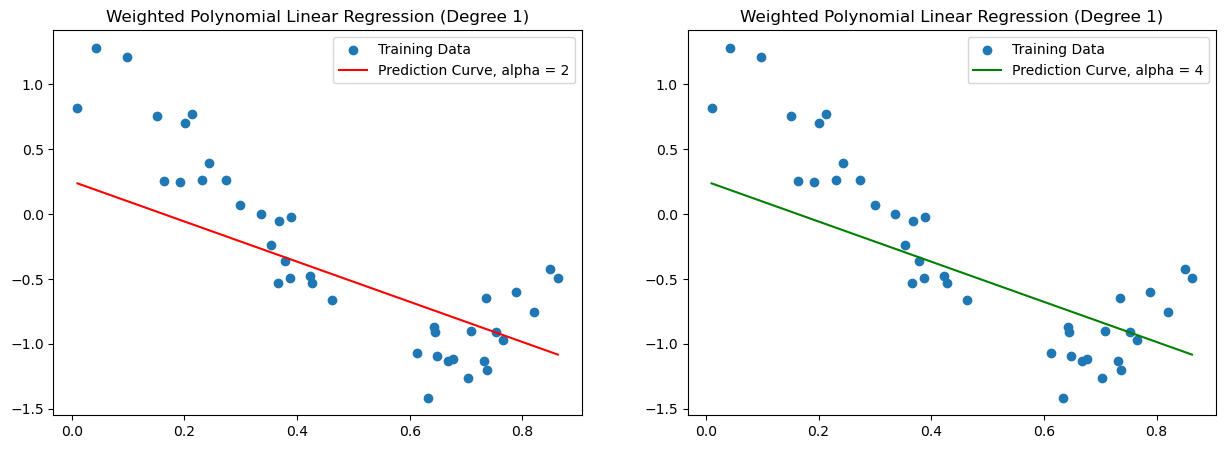

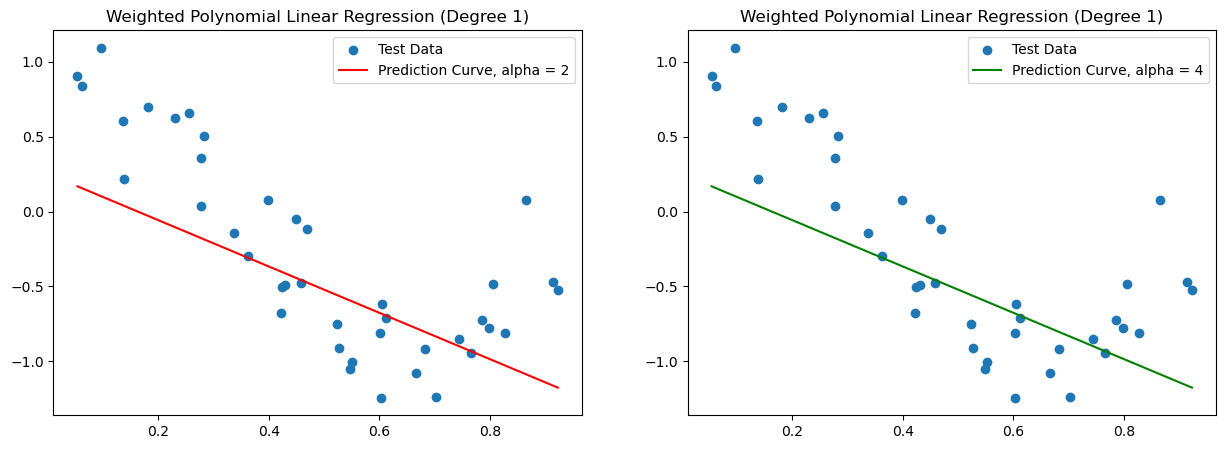

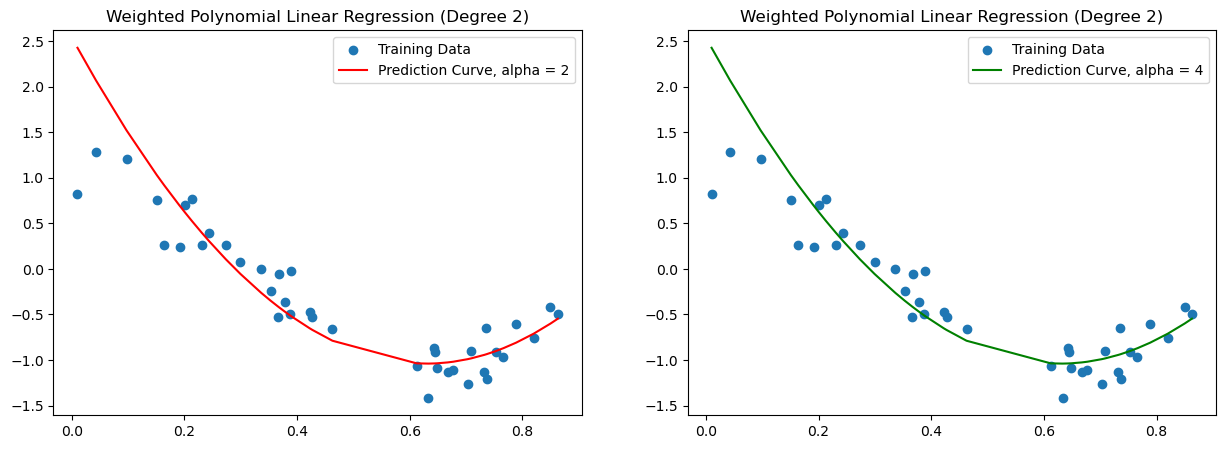

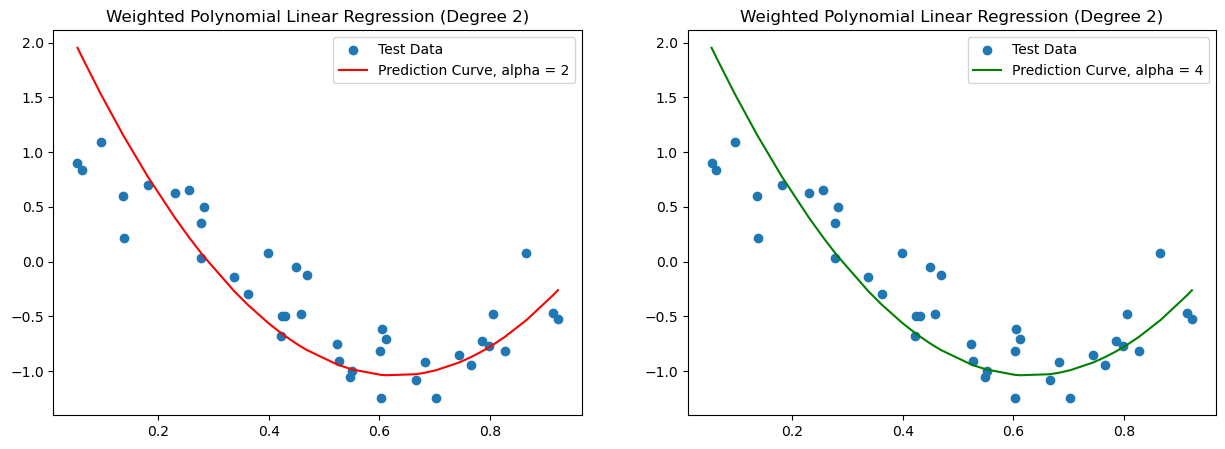

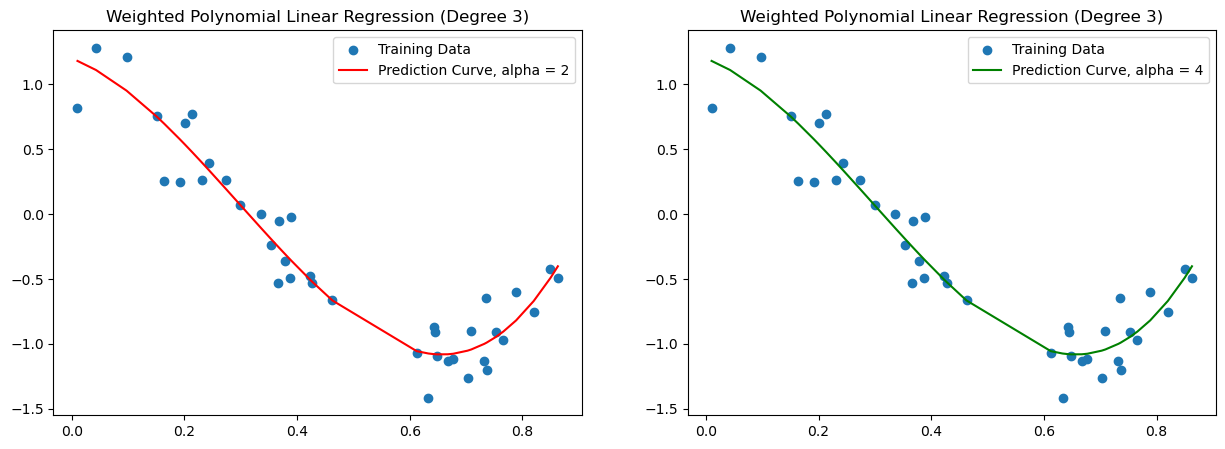

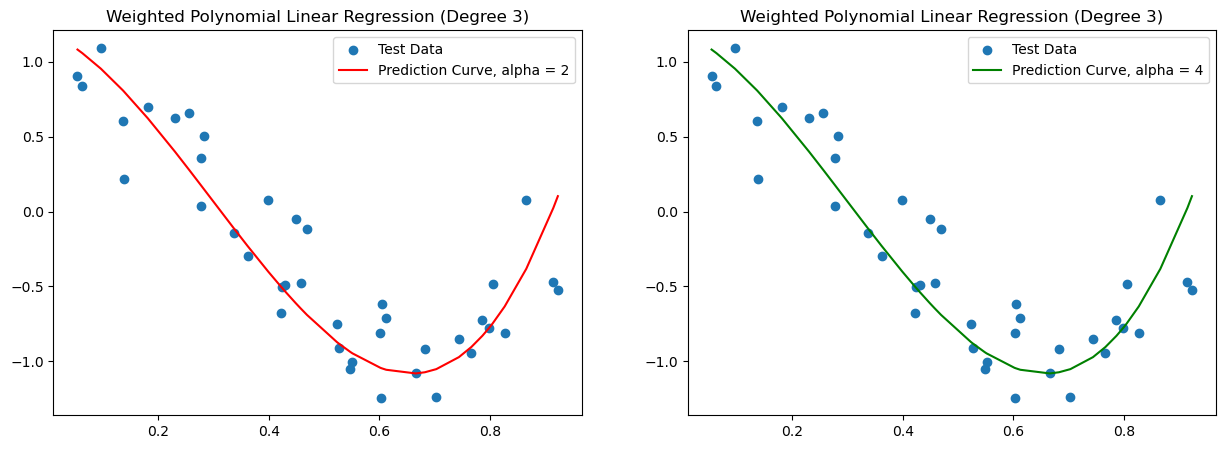

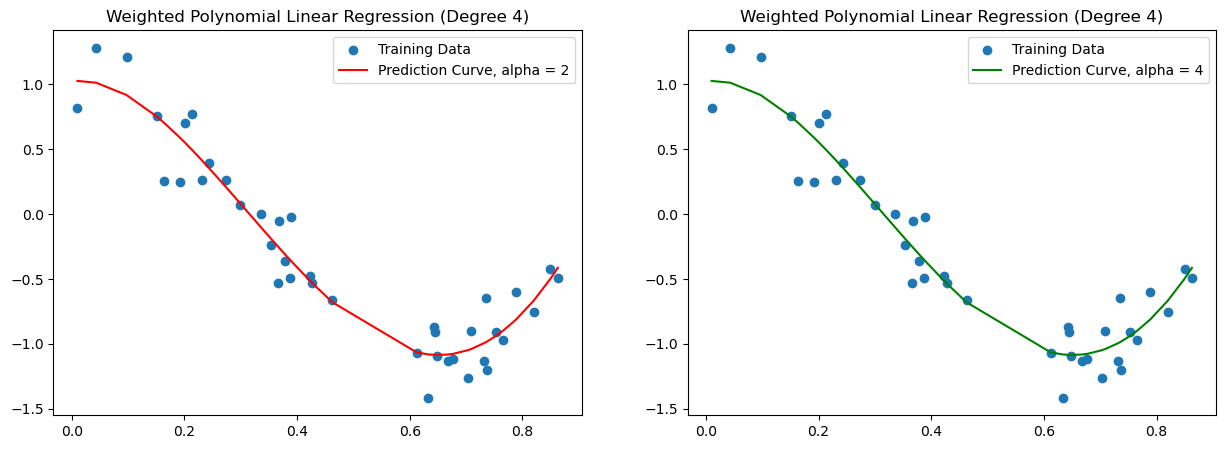

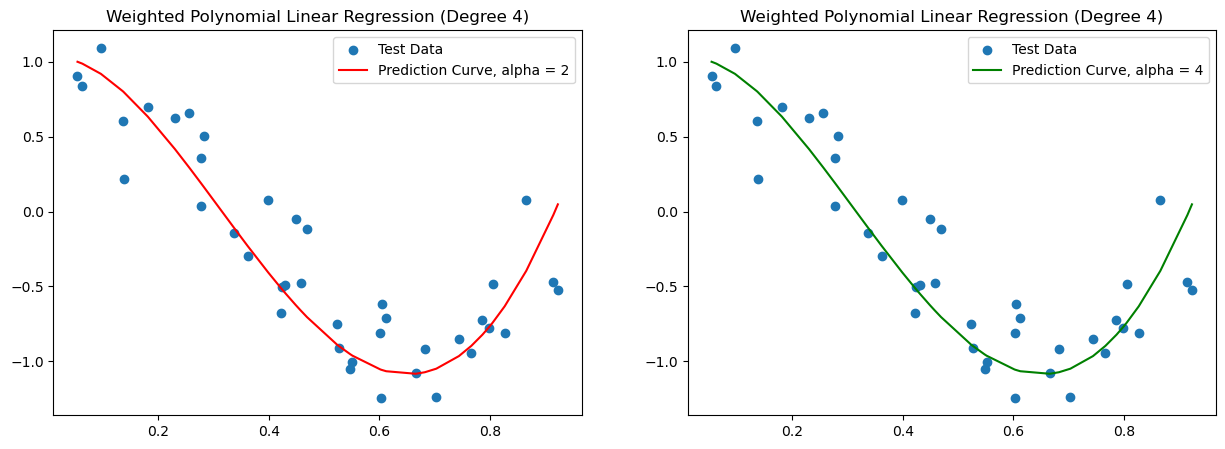

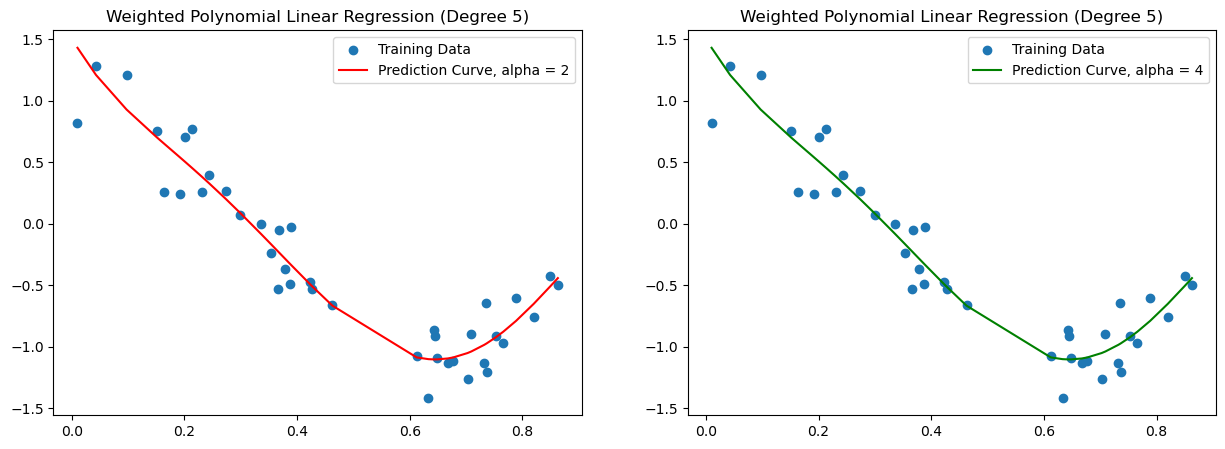

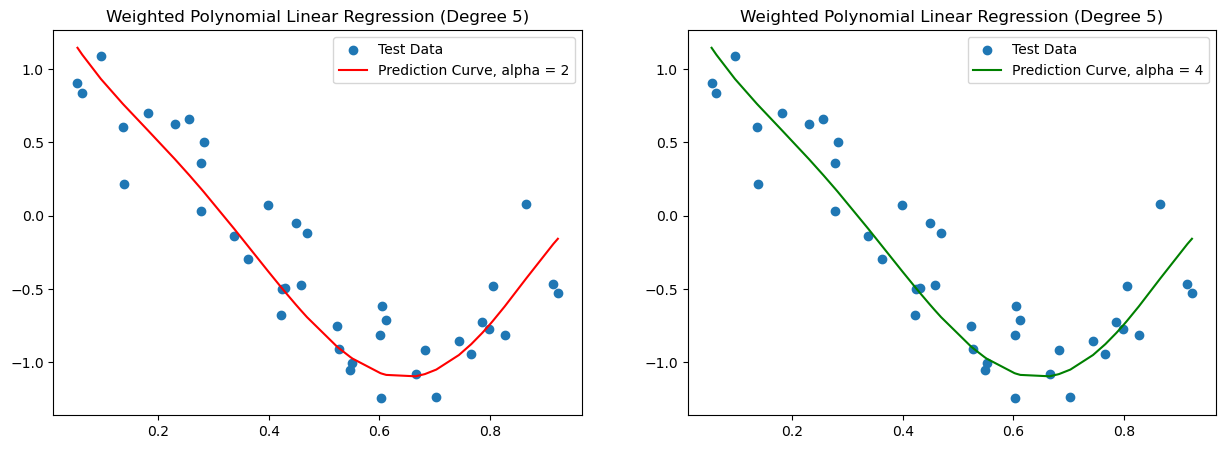

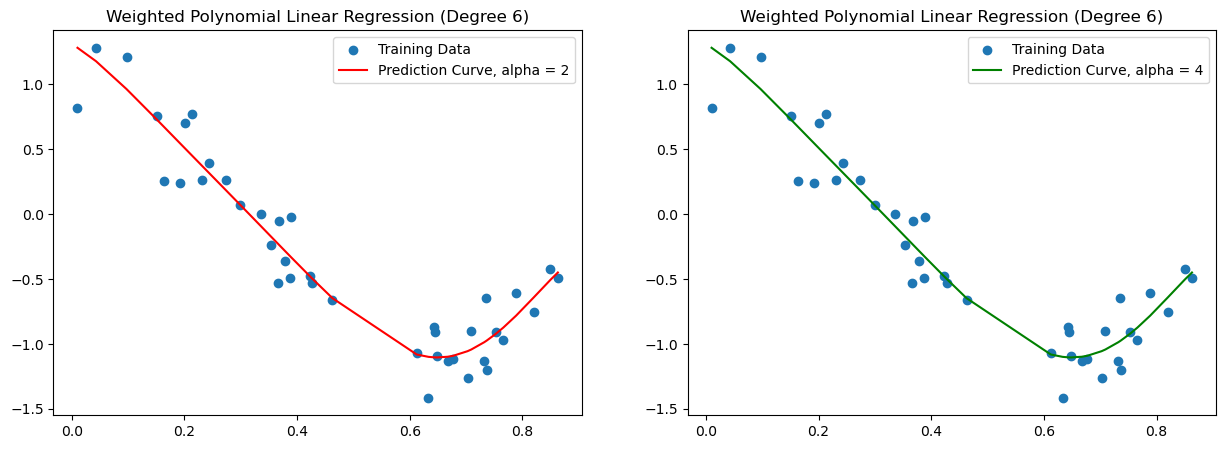

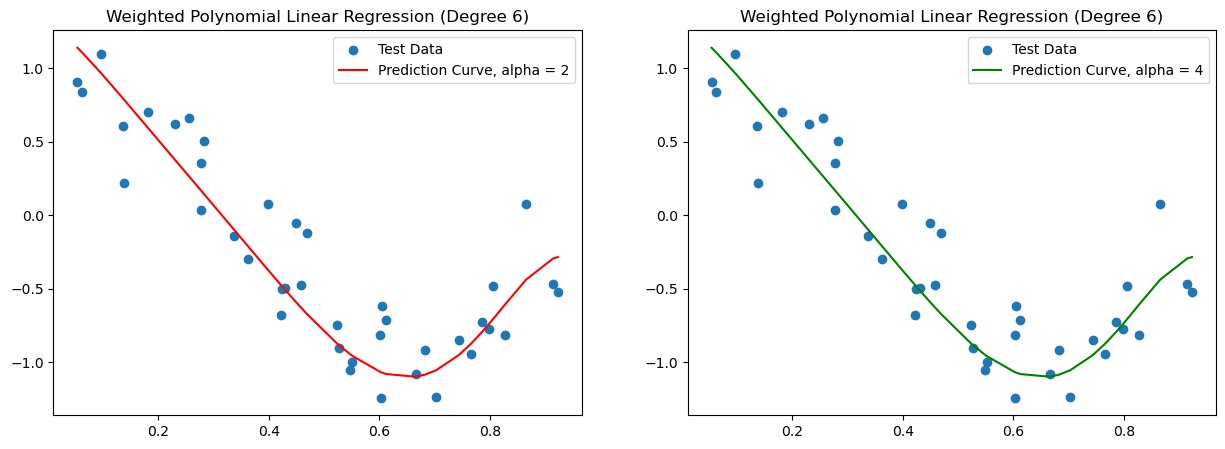

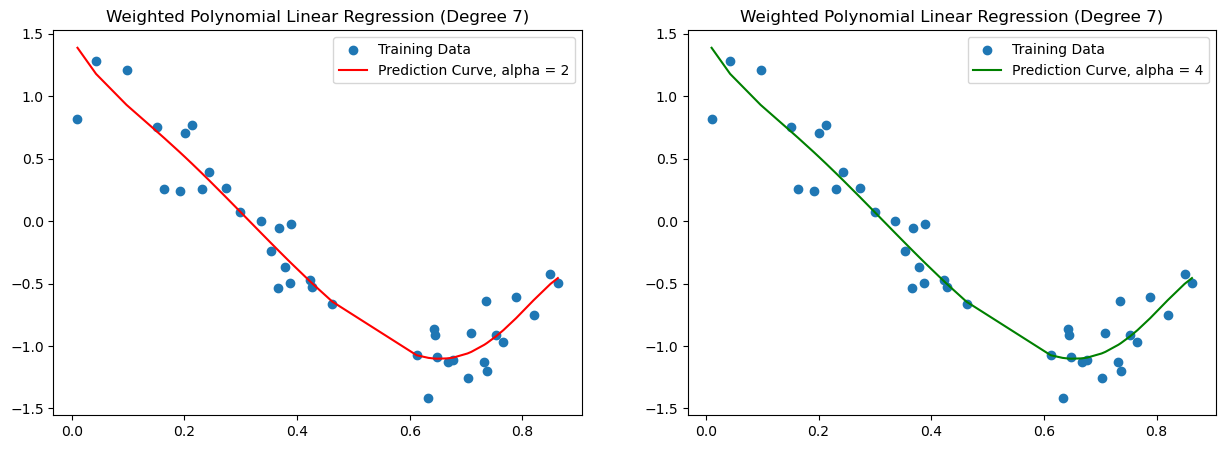

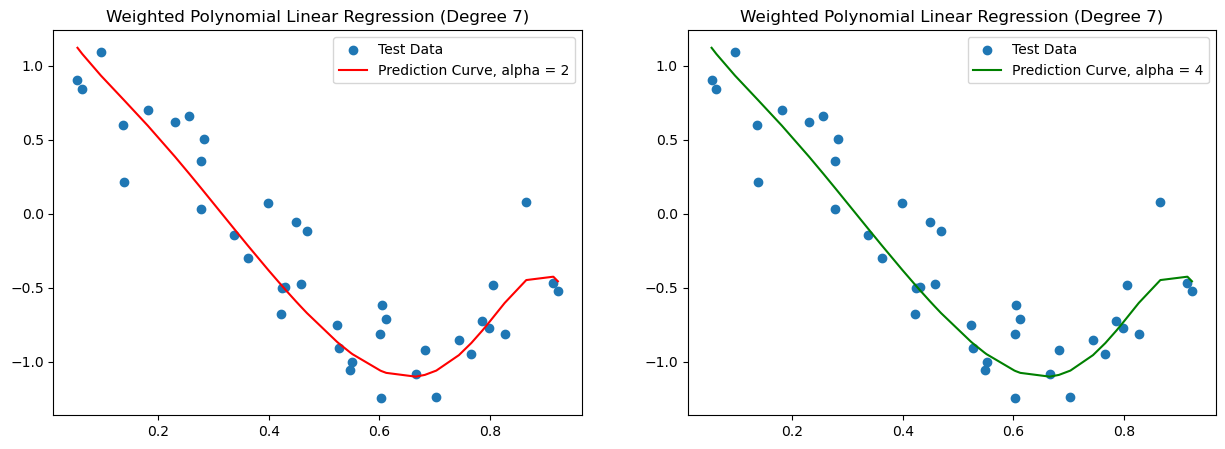

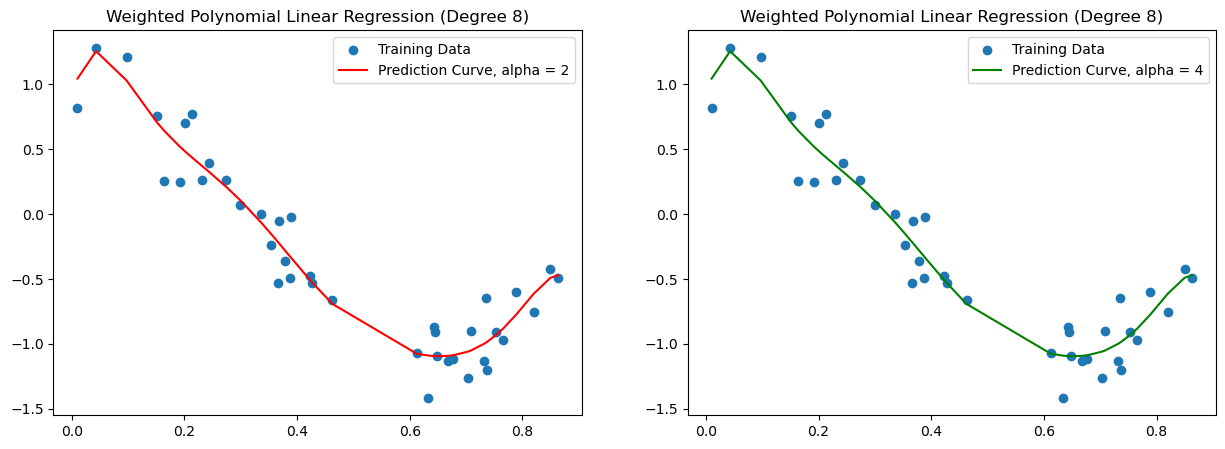

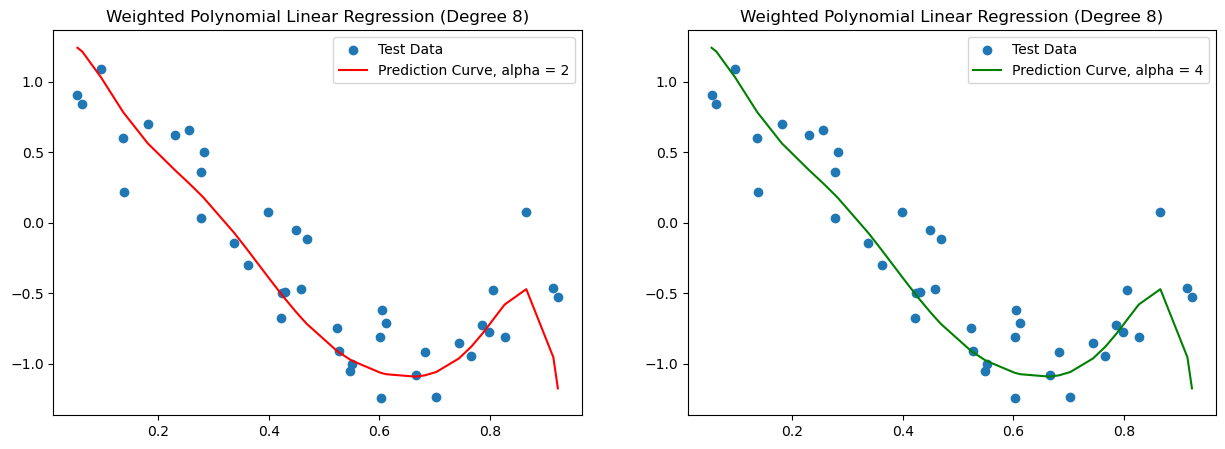

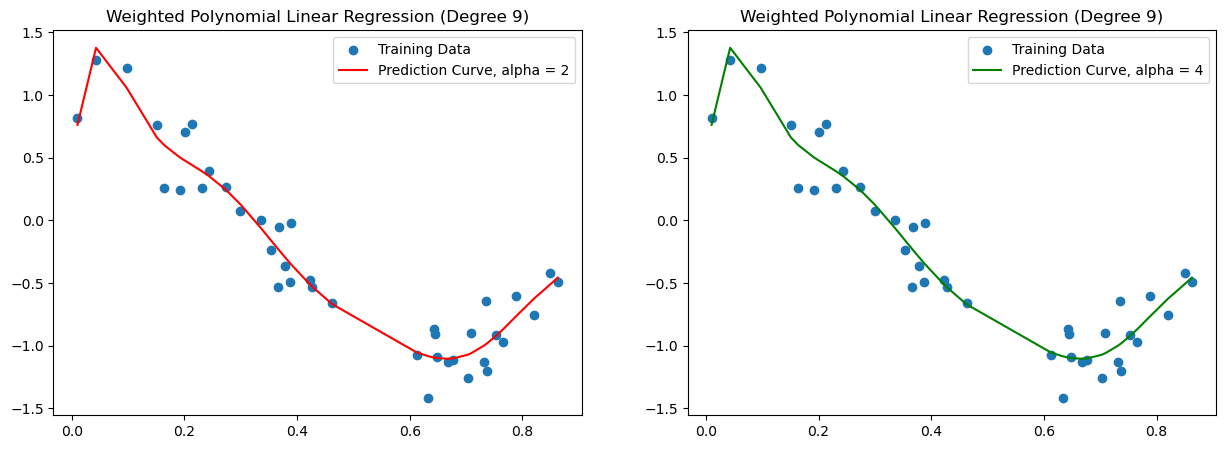

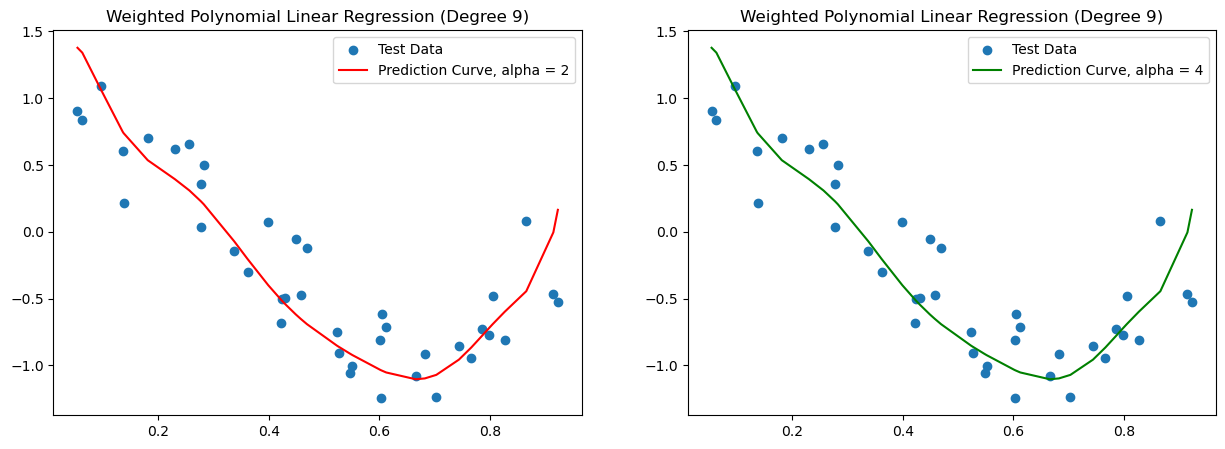

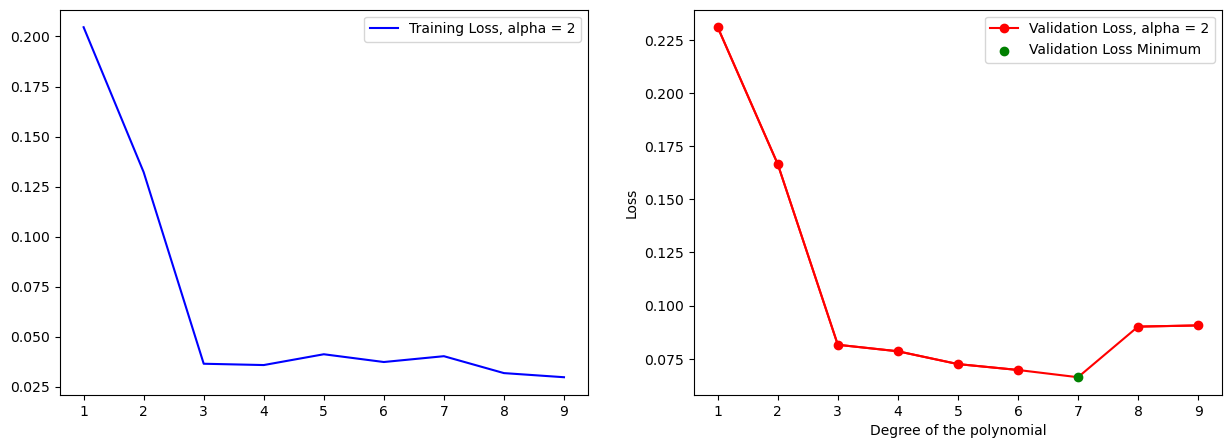

In [ ]:
# Part 1
alpha = 2

# Part 2
alpha_2 = 4

train_error_list = []
validation_error_list = []

train_error_list_2 = []
validation_error_list_2 = []
    
for deg in range(1,10):
    # 1. Estimate the best model using least square fitting
    X_train = make_matrix(x_train, deg)
    ## alpha = 2
    w_train = weighted_least_square_solution(x_train, y_train, deg, alpha)
    ## alpha = 4
    w_train2 = weighted_least_square_solution(x_train, y_train, deg, alpha_2)
    
    X_test = make_matrix(x_test, deg)

    # 2. Make predictions\
    ## alpha = 2
    predict_train = predict(X_train, w_train)
    predict_test = predict(X_test, w_train)
    ## alpha = 4
    predict_train_2 = predict(X_train, w_train2)
    predict_test_2 = predict(X_test, w_train2)

    # 3. Visualize model's fit to data
    indices = np.argsort(x_train)
    x_train_sorted = x_train[indices]
    ## alpha = 2
    predict_train_sorted = predict_train[indices]
    ## alpha = 4
    predict_train_sorted_2 = predict_train_2[indices]

    indices = np.argsort(x_test)
    x_test_sorted = x_test[indices]
    ## alpha = 2
    predict_test_sorted = predict_test[indices]
    ## alpha = 4
    predict_test_sorted_2 = predict_test_2[indices]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 5))
    
    axes[0].set_title("Weighted Polynomial Linear Regression (Degree " + str(deg) + ")")
    axes[0].scatter(x_train, y_train, label="Training Data")
    axes[0].plot(x_train_sorted, predict_train_sorted, "r", label="Prediction Curve, alpha = 2")
    axes[0].legend()

    axes[1].set_title("Weighted Polynomial Linear Regression (Degree " + str(deg) + ")")
    axes[1].scatter(x_train, y_train, label="Training Data")
    axes[1].plot(x_train_sorted, predict_train_sorted_2, "g", label="Prediction Curve, alpha = 4")
    axes[1].legend()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 5))

    axes[0].set_title("Weighted Polynomial Linear Regression (Degree " + str(deg) + ")")
    axes[0].scatter(x_test, y_test, label="Test Data")
    axes[0].plot(x_test_sorted, predict_test_sorted, "r", label="Prediction Curve, alpha = 2")
    axes[0].legend()

    axes[1].set_title("Weighted Polynomial Linear Regression (Degree " + str(deg) + ")")
    axes[1].scatter(x_test, y_test, label="Test Data")
    axes[1].plot(x_test_sorted, predict_test_sorted_2, "g", label="Prediction Curve, alpha = 4")
    axes[1].legend()

    # 4. Store training and testing/validation loss in the lists defined above
    train_error = mse_loss(y_train, predict_train)
    train_error_list.append(train_error)

    test_error = mse_loss(y_test, predict_test)
    validation_error_list.append(test_error)


# Plot the training and validation loss
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 5))
axes[0].plot(degree_axis, train_error_list, label="Training Loss, alpha = 2", color="blue")
axes[0].legend()

# minimum value
min_y = np.argmin(validation_error_list)
min_x = degree_axis[min_y]

plt.plot(degree_axis, validation_error_list, color="red", zorder=0)
plt.plot(degree_axis[:min_y], validation_error_list[:min_y], label="Validation Loss, alpha = 2", color="red", marker="o")
plt.plot(degree_axis[1+min_y:], validation_error_list[1+min_y:], color="red", marker="o")
plt.scatter(degree_axis[min_y], validation_error_list[min_y], label="Validation Loss Minimum", color="g")
plt.xlabel("Degree of the polynomial")
plt.ylabel("Loss")

plt.legend()
plt.show()

--

**Double-click (or enter) to write your textual answer for Task 6, Part 2 here**

--

## Student Statement on Usage of Generative AI Tools

Students MUST write a statement in this cell detailing their usage of any generative AI tools. If no such tool was used, write "*I have not used any generative AI tool for completing this assignment*".

"I have not used any generative AI tool for completing this assignment"

In case such tools were used (and you are allowed to), the statement should read "*I have used generative AI tools for completing this assignment for Tasks (list the tasks) as per the following details*:". This should be followed by the following information:

1. What tools were used?
2. How exactly were they used?